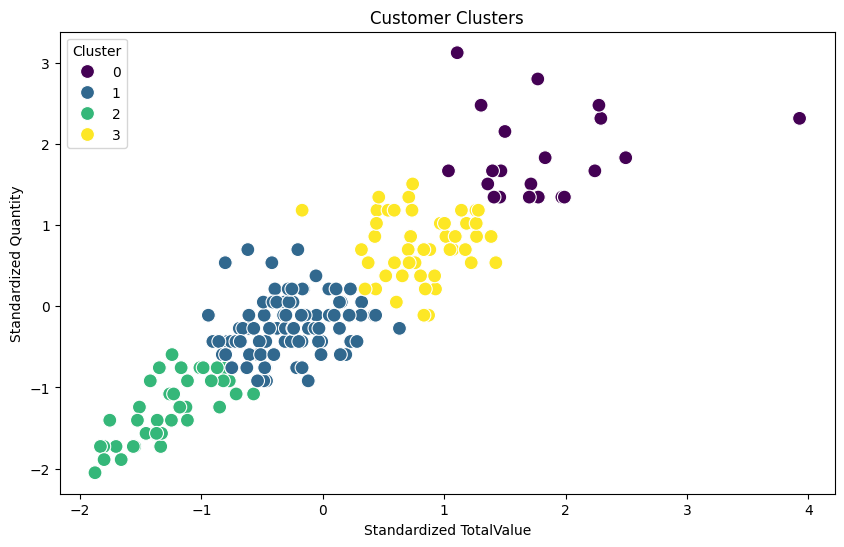

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_profiles = pd.merge(customers, customer_transactions, on='CustomerID', how='left')
customer_profiles.fillna(0, inplace=True)  # Fill missing values with 0 for customers without transactions

# Feature selection for clustering
features = customer_profiles[['TotalValue', 'Quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_profiles['Cluster'])

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=customer_profiles['Cluster'], palette='viridis', s=100
)
plt.title('Customer Clusters')
plt.xlabel('Standardized TotalValue')
plt.ylabel('Standardized Quantity')
plt.legend(title='Cluster')
plt.savefig('FirstName_LastName_Clustering.png')
plt.show()

# Save clustering results
clustering_metrics = {
    "number_of_clusters": 4,
    "db_index": db_index,
    "cluster_sizes": customer_profiles['Cluster'].value_counts().to_dict()
}

with open('FirstName_LastName_Clustering_Report.txt', 'w') as f:
    f.write("Number of clusters formed: {}\n".format(clustering_metrics['number_of_clusters']))
    f.write("Davies-Bouldin Index: {:.4f}\n".format(clustering_metrics['db_index']))
    f.write("Cluster sizes: {}\n".format(clustering_metrics['cluster_sizes']))

# Save clustered customer data
customer_profiles.to_csv('FirstName_LastName_Clustering.csv', index=False)